In [1]:
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM
from rmgpy import settings
import time
import matplotlib.pyplot as plt
import matplotlib

In [26]:
import re

In [2]:
settings

{'database.directory': '/home/khalil.nor/Code/RMG-database/input',
 'test_data.directory': '/home/khalil.nor/Code/RMG-Py/rmgpy/test_data'}

In [ ]:
#these families just had training rxns added to them 

#dict_keys(['1,2_Insertion_carbene', 'R_Addition_MultipleBond', 'XY_Addition_MultipleBond', 'Singlet_Carbene_Intra_Disproportionation', '1,2_Insertion_CO', '1+2_Cycloaddition', '1,3_Insertion_CO2', '1,3_sigmatropic_rearrangement'])

In [3]:
thermo_libs = [
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ['R_Recombination', '1,2_Insertion_carbene', 'F_Abstraction', 'R_Addition_MultipleBond', 'XY_Addition_MultipleBond', 'Singlet_Carbene_Intra_Disproportionation', 'Intra_R_Add_Endocyclic', 'R_Addition_COm', '1,2_Insertion_CO', '1+2_Cycloaddition', '1,3_Insertion_CO2', '1,3_sigmatropic_rearrangement']

In [4]:
database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )


In [5]:
database.kinetics.families

{'1+2_Cycloaddition': <ReactionFamily "1+2_Cycloaddition">,
 '1,2_Insertion_CO': <ReactionFamily "1,2_Insertion_CO">,
 '1,2_Insertion_carbene': <ReactionFamily "1,2_Insertion_carbene">,
 '1,3_Insertion_CO2': <ReactionFamily "1,3_Insertion_CO2">,
 '1,3_sigmatropic_rearrangement': <ReactionFamily "1,3_sigmatropic_rearrangement">,
 'F_Abstraction': <ReactionFamily "F_Abstraction">,
 'Intra_R_Add_Endocyclic': <ReactionFamily "Intra_R_Add_Endocyclic">,
 'R_Addition_COm': <ReactionFamily "R_Addition_COm">,
 'R_Addition_MultipleBond': <ReactionFamily "R_Addition_MultipleBond">,
 'R_Recombination': <ReactionFamily "R_Recombination">,
 'Singlet_Carbene_Intra_Disproportionation': <ReactionFamily "Singlet_Carbene_Intra_Disproportionation">,
 'XY_Addition_MultipleBond': <ReactionFamily "XY_Addition_MultipleBond">}

In [6]:
# 'R_Addition_COm' 
family_to_train = "R_Addition_COm"
family = database.kinetics.families[family_to_train]

In [7]:
family.clean_tree()

In [8]:
start = time.time()
family.generate_tree(thermo_database=database.thermo,
                     nprocs=1,
                     new_fraction_threshold_to_reopt_node=0.25,
                     max_batch_size=800,
                     extension_iter_max=2,
                     extension_iter_item_cap=100)

end = time.time()
print(end-start)

ERROR:root:22.0
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early


177.81528401374817


In [9]:
len(family.groups.entries)

28

In [10]:
family.groups.entries

{'YC.=O': <Entry index=-1 label="YC.=O">,
 'Root': <Entry index=0 label="Root">,
 'Root_3R->O': <Entry index=1 label="Root_3R->O">,
 'Root_N-3R->O': <Entry index=2 label="Root_N-3R->O">,
 'Root_N-3R->O_3BrCClFHINPSSi->Br': <Entry index=3 label="Root_N-3R->O_3BrCClFHINPSSi->Br">,
 'Root_N-3R->O_N-3BrCClFHINPSSi->Br': <Entry index=4 label="Root_N-3R->O_N-3BrCClFHINPSSi->Br">,
 'Root_N-3R->O_N-3BrCClFHINPSSi->Br_3CClHS->Cl': <Entry index=5 label="Root_N-3R->O_N-3BrCClFHINPSSi->Br_3CClHS->Cl">,
 'Root_N-3R->O_N-3BrCClFHINPSSi->Br_N-3CClHS->Cl': <Entry index=6 label="Root_N-3R->O_N-3BrCClFHINPSSi->Br_N-3CClHS->Cl">,
 'Root_N-3R->O_N-3BrCClFHINPSSi->Br_N-3CClHS->Cl_3CHS-inRing': <Entry index=7 label="Root_N-3R->O_N-3BrCClFHINPSSi->Br_N-3CClHS->Cl_3CHS-inRing">,
 'Root_N-3R->O_N-3BrCClFHINPSSi->Br_N-3CClHS->Cl_N-3CHS-inRing': <Entry index=8 label="Root_N-3R->O_N-3BrCClFHINPSSi->Br_N-3CClHS->Cl_N-3CHS-inRing">,
 'Root_N-3R->O_N-3BrCClFHINPSSi->Br_N-3CClHS->Cl_3CHS-inRing_Ext-3CHS-R_4R!H->O': <

In [11]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

0.002315044403076172


In [12]:
start = time.time()
family.regularize(thermo_database=database.thermo)
end = time.time()
print(end-start)

1.0400974750518799


In [13]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

1.0586326122283936


In [14]:
len(templateRxnMap)

28

In [15]:
family.clean_tree_rules()

In [16]:
start = time.time()
family.make_bm_rules_from_template_rxn_map(templateRxnMap)#,nprocs=6)
end = time.time()
print(end-start)

/home/khalil.nor/Code/RMG-Py/rmgpy/data/kinetics/family.py:3639: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for rxns, label in rxnlists])
/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.2022929191589355


In [17]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

0.004838705062866211


In [18]:
start = time.time()
errors,uncertainties = family.cross_validate(iters=0,random_state=5,folds=0,ascend=False)
end = time.time()
print(end-start)

1.2706375122070312


/work/westgroup/nora/miniconda/envs/rmg_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [19]:
save_path = os.path.join(settings['database.directory'], 'kinetics', 'families', family.name)
print(save_path)

/home/khalil.nor/Code/RMG-database/input/kinetics/families/R_Addition_COm


In [20]:
family.save(save_path)

In [ ]:
#ran to completion on May 7th, 10:15 am

In [ ]:
#let's check to see what the fit is like at the end nodes

In [1]:
from rmgpy.kinetics.uncertainties import RateUncertainty
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM, Arrhenius
from rmgpy import settings
import time
import matplotlib.pyplot as plt
import matplotlib
import rmgpy.constants as constants

In [2]:
thermo_libs = [
#'PFCA_thermo', this was not added for this family yet
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ["R_Addition_COm"]

database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )

In [3]:
database.kinetics.families

{'R_Addition_COm': <ReactionFamily "R_Addition_COm">}

In [4]:
# "R_Addition_COm"
family_to_train = "R_Addition_COm"
family = database.kinetics.families[family_to_train]

In [5]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

191.06697344779968


Let's look at some of the parent nodes (with 2 reactions) and their child nodes (with 1 reaction) to see how the fits compare

In [16]:
n_2_mapping = [key for key, value in templateRxnMap.items() if len(value)==2] #mapping of all nodes with 3 or less training rxns (parents)
n_1_mapping = [key for key, value in templateRxnMap.items() if len(value)==1] #mapping of all nodes with 1 training rxn (children)
n_4_mapping = [key for key, value in templateRxnMap.items() if len(value)==4] 
parent_to_child = {}
parent_to_child_4 = {}

for label in n_2_mapping: 
    
    #make the parent node
    parent_node, _ = family.retrieve_original_entry(label)
    
    #now find the children with just 1 reaction
    children_nodes = []
    for test_label in n_1_mapping:
        if label in test_label:
            child_node, _ = family.retrieve_original_entry(test_label)
            children_nodes.append(child_node)
            
    print(len(templateRxnMap[label]),len(children_nodes))        
    if len(templateRxnMap[label])==len(children_nodes): #let's pick out the ones that are both two
        parent_to_child[parent_node.label] = [x.label for x in children_nodes]
        
for label in n_4_mapping: 
    
    #make the parent node
    parent_node, _ = family.retrieve_original_entry(label)
    
    #now find the children with just 1 reaction
    children_nodes = []
    for test_label in n_1_mapping:
        if label in test_label:
            child_node, _ = family.retrieve_original_entry(test_label)
            children_nodes.append(child_node)
            
    print(len(templateRxnMap[label]),len(children_nodes))
    if len(templateRxnMap[label])==len(children_nodes): #let's pick out the ones that are both two
        parent_to_child_4[parent_node.label] = [x.label for x in children_nodes]
#parent_to_child is a dictionary where key = label of parent and value = label of children

2 2
2 2
2 1
2 1
2 0
4 3


C6H5 + CO <=> C7H5O
C5H5O + CO <=> C6H5O2
yeah
yeah
0.00721 0.007210000000000001
1480000.0 1480000.0000000002
0.00721 m^3/(mol*s) 7210 cm^3/(mol*s)


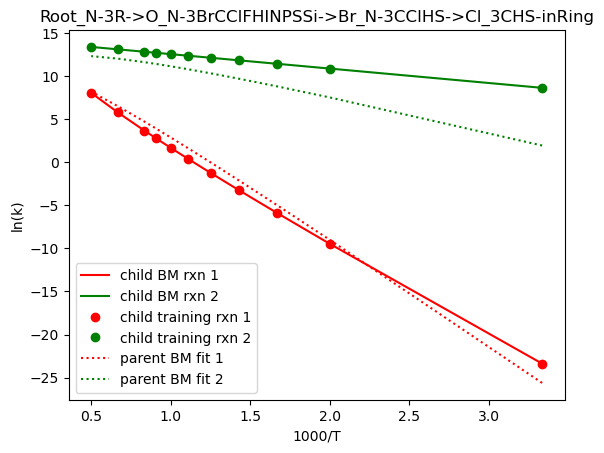

[C-]#[O+] + F[C](F)C(F)(F)F <=> C3F5O
[C-]#[O+] + F[C](F)C(F)(F)C(F)(F)F <=> C4F7O
yeah
yeah
0.00113676 0.0011367564074869815
0.00136302 0.0013630205289092657
0.00113676 m^3/(mol*s) 0.00113676 m^3/(mol*s)


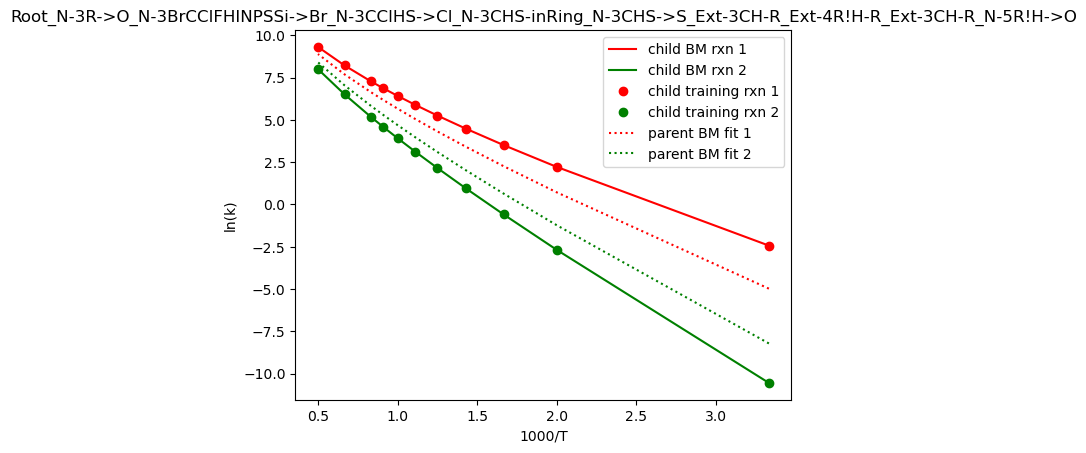

In [35]:
%matplotlib inline
temperatures = [ 300., 500.,  600.,  700. , 800.,  900., 1000., 1100., 1200., 1500., 2000.]
inverse_temps = [1000/T for T in temperatures]



for parent_label, children_labels in parent_to_child.items():
    
    training_rxns = templateRxnMap[parent_label] 
    for tr_rxn in training_rxns:
        print(tr_rxn)
    BM_entries = [family.retrieve_original_entry(label)[0].data for label in children_labels]

    matches = []
    matched_BM = []

    for BM_kinetics in BM_entries:
        for tr_rxn in training_rxns:
            BM_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(BM_kinetics.A.value_si)).group(1)
            tr_str_of_float = re.search('([1-9]\.?[0-9][0-9])', str(tr_rxn.kinetics.A.value_si)).group(1)
            if BM_str_of_float==tr_str_of_float:
            #if str(BM_kinetics.A.value_si)[0:4]==str(tr_rxn.kinetics.A.value_si)[0:4]:
                print('yeah')
                matches.append((Reaction(reactants=tr_rxn.reactants, products=tr_rxn.products, kinetics = BM_kinetics), tr_rxn))
                matched_BM.append(BM_kinetics)
    if len(matches)==0:
        print("couldn't find any matches")
        continue
        #skipping because the A's are probably very different
        
    #if you miss matching all of them
    if len(matches)==1:
        leftover_tr_rxn = [tr_rxn for tr_rxn in training_rxns if tr_rxn not in matches[0]][0]
        leftover_BM_kinetics = [BM_kinetics for BM_kinetics in BM_entries if BM_kinetics not in matched_BM][0]
        leftover_BM_reaction = Reaction(reactants=leftover_tr_rxn.reactants, products=leftover_tr_rxn.products, kinetics = leftover_BM_kinetics)
        #print(leftover_BM_reaction.kinetics.A, leftover_tr_rxn.kinetics.A)
        matches.append((leftover_BM_reaction, leftover_tr_rxn))

    for (BM, tr) in matches: 
        print(str(BM.kinetics.A.value_si), str(tr.kinetics.A.value_si))
        
    child_node_1_BM_rxn, child_training_rxn_1= matches[0] 
    child_node_2_BM_rxn, child_training_rxn_2 = matches[1] 
    
    #empty lists for collecting data
    parent_node_rate_coefficients_1 = []
    parent_node_rate_coefficients_2 = []

    child_node_1_rate_coefficients = []
    child_node_2_rate_coefficients = []

    child_tr_rxn_coeffs_1 = []
    child_tr_rxn_coeffs_2 = []
    
    #let's make the parent BM node
    parent_node, _ = family.retrieve_original_entry(parent_label)
    BM_parent_rxn = Reaction(kinetics = parent_node.data)

    
    #get the dHrxns 
    
    dHrxn_1 = child_node_1_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_2 = child_node_2_BM_rxn.get_enthalpy_of_reaction(298)

    
    for temp in temperatures: 
        
        #calculate training rxn rate
        tr_rate_1 = child_training_rxn_1.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_2 =child_training_rxn_2.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap

        child_tr_rxn_coeffs_1.append(tr_rate_1)
        child_tr_rxn_coeffs_2.append(tr_rate_2)
        
        #calculate BM child rates
        BM_child_rate_1 = child_node_1_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1) #loaded in as BM kinetics 
        BM_child_rate_2 = child_node_2_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2) #loaded in as BM kinetics 

        child_node_1_rate_coefficients.append(BM_child_rate_1)
        child_node_2_rate_coefficients.append(BM_child_rate_2)
        
        #calculate BM for parent node at both dHrxns for child rxns
        BM_parent_node_rate_dH1 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1)
        parent_node_rate_coefficients_1.append(BM_parent_node_rate_dH1)
        BM_parent_node_rate_dH2 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2)
        parent_node_rate_coefficients_2.append(BM_parent_node_rate_dH2)
        
    
    #get lnks

    parent_node_1 = [np.log(rate) for rate in parent_node_rate_coefficients_1]
    parent_node_2 = [np.log(rate) for rate in parent_node_rate_coefficients_2]
    child_node_1 = [np.log(rate) for rate in child_node_1_rate_coefficients]  
    child_node_2 = [np.log(rate) for rate in child_node_2_rate_coefficients]
    child_tr_1 = [np.log(rate) for rate in child_tr_rxn_coeffs_1]
    child_tr_2 = [np.log(rate) for rate in child_tr_rxn_coeffs_2]


    print(child_node_1_BM_rxn.kinetics.A, child_training_rxn_1.kinetics.A)
    #plotting
    plt.figure()   
    plt.plot(inverse_temps, child_node_1, '-', c= 'r', label = 'child BM rxn 1')
    plt.plot(inverse_temps, child_node_2, '-', c= 'g', label = 'child BM rxn 2')
    plt.plot(inverse_temps, child_tr_1, 'o', c='r', label='child training rxn 1')
    plt.plot(inverse_temps, child_tr_2, 'o', c='g', label='child training rxn 2')
    plt.plot(inverse_temps, parent_node_1, ':', c='r', label = 'parent BM fit 1')   
    plt.plot(inverse_temps, parent_node_2, ':', c='g', label = 'parent BM fit 2')   


    plt.title(parent_label)
    plt.xlabel('1000/T')
    plt.ylabel('ln(k)')
    plt.legend()
    plt.show()

In [34]:
#n = 4, node with 4 reactions
%matplotlib inline
temperatures = [ 300., 500.,  600.,  700. , 800.,  900., 1000., 1100., 1200., 1500., 2000.]
inverse_temps = [1000/T for T in temperatures]



for parent_label, children_labels in parent_to_child_4.items():
    
    training_rxns = templateRxnMap[parent_label] 
    for tr_rxn in training_rxns:
        print(tr_rxn)
    BM_entries = [family.retrieve_original_entry(label)[0].data for label in children_labels]

    matches = []
    matched_BM = []

    for BM_kinetics in BM_entries:
        for tr_rxn in training_rxns:
            if str(BM_kinetics.A.value_si)[0:4]==str(tr_rxn.kinetics.A.value_si)[0:4]:
                print('yeah')
                matches.append((Reaction(reactants=tr_rxn.reactants, products=tr_rxn.products, kinetics = BM_kinetics), tr_rxn))
                matched_BM.append(BM_kinetics)
    if len(matches)==0:
        print("couldn't find any matches")
        continue
        #skipping because the A's are probably very different
        
    #if you miss matching all of them
    if len(matches)==1:
        leftover_tr_rxn = [tr_rxn for tr_rxn in training_rxns if tr_rxn not in matches[0]][0]
        leftover_BM_kinetics = [BM_kinetics for BM_kinetics in BM_entries if BM_kinetics not in matched_BM][0]
        leftover_BM_reaction = Reaction(reactants=leftover_tr_rxn.reactants, products=leftover_tr_rxn.products, kinetics = leftover_BM_kinetics)
        #print(leftover_BM_reaction.kinetics.A, leftover_tr_rxn.kinetics.A)
        matches.append((leftover_BM_reaction, leftover_tr_rxn))

    child_node_1_BM_rxn, child_training_rxn_1= matches[0] 
    child_node_2_BM_rxn, child_training_rxn_2 = matches[1] 
    child_node_3_BM_rxn, child_training_rxn_3= matches[2] 
    child_node_4_BM_rxn, child_training_rxn_4 = matches[3] 
    
    #empty lists for collecting data
    parent_node_rate_coefficients_1 = []
    parent_node_rate_coefficients_2 = []
    parent_node_rate_coefficients_3 = []
    parent_node_rate_coefficients_4 = []

    child_node_1_rate_coefficients = []
    child_node_2_rate_coefficients = []
    child_node_3_rate_coefficients = []
    child_node_4_rate_coefficients = []

    child_tr_rxn_coeffs_1 = []
    child_tr_rxn_coeffs_2 = []
    child_tr_rxn_coeffs_3 = []
    child_tr_rxn_coeffs_4 = []
    
    #let's make the parent BM node
    parent_node, _ = family.retrieve_original_entry(parent_label)
    BM_parent_rxn = Reaction(kinetics = parent_node.data)

    
    #get the dHrxns 
    
    dHrxn_1 = child_node_1_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_2 = child_node_2_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_3 = child_node_3_BM_rxn.get_enthalpy_of_reaction(298)
    dHrxn_4 = child_node_4_BM_rxn.get_enthalpy_of_reaction(298)

    
    for temp in temperatures: 
        
        #calculate training rxn rate
        tr_rate_1 = child_training_rxn_1.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_2 =child_training_rxn_2.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_3 = child_training_rxn_3.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap
        tr_rate_4 =child_training_rxn_4.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as Arr training rxn from templateRxnMap

        child_tr_rxn_coeffs_1.append(tr_rate_1)
        child_tr_rxn_coeffs_2.append(tr_rate_2)
        child_tr_rxn_coeffs_3.append(tr_rate_3)
        child_tr_rxn_coeffs_4.append(tr_rate_4)
        
        #calculate BM child rates
        BM_child_rate_1 = child_node_1_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1) #loaded in as BM kinetics 
        BM_child_rate_2 = child_node_2_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2) #loaded in as BM kinetics 
        BM_child_rate_3 = child_node_3_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_3) #loaded in as BM kinetics 
        BM_child_rate_4 = child_node_4_BM_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_4) #loaded in as BM kinetics 

        child_node_1_rate_coefficients.append(BM_child_rate_1)
        child_node_2_rate_coefficients.append(BM_child_rate_2)
        child_node_3_rate_coefficients.append(BM_child_rate_3)
        child_node_4_rate_coefficients.append(BM_child_rate_4)
        
        #calculate BM for parent node at both dHrxns for child rxns
        BM_parent_node_rate_dH1 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_1)
        parent_node_rate_coefficients_1.append(BM_parent_node_rate_dH1)
        BM_parent_node_rate_dH2 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_2)
        parent_node_rate_coefficients_2.append(BM_parent_node_rate_dH2)
        BM_parent_node_rate_dH3 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_3)
        parent_node_rate_coefficients_3.append(BM_parent_node_rate_dH3)
        BM_parent_node_rate_dH4 = BM_parent_rxn.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn_4)
        parent_node_rate_coefficients_4.append(BM_parent_node_rate_dH4)
        
    
    #get lnks

    parent_node_1 = [np.log(rate) for rate in parent_node_rate_coefficients_1]
    parent_node_2 = [np.log(rate) for rate in parent_node_rate_coefficients_2]
    parent_node_3 = [np.log(rate) for rate in parent_node_rate_coefficients_3]
    parent_node_4 = [np.log(rate) for rate in parent_node_rate_coefficients_4]
    
    child_node_1 = [np.log(rate) for rate in child_node_1_rate_coefficients]  
    child_node_2 = [np.log(rate) for rate in child_node_2_rate_coefficients]
    child_node_3 = [np.log(rate) for rate in child_node_3_rate_coefficients]  
    child_node_4 = [np.log(rate) for rate in child_node_4_rate_coefficients]
    
    child_tr_1 = [np.log(rate) for rate in child_tr_rxn_coeffs_1]
    child_tr_2 = [np.log(rate) for rate in child_tr_rxn_coeffs_2]
    child_tr_3 = [np.log(rate) for rate in child_tr_rxn_coeffs_3]
    child_tr_4 = [np.log(rate) for rate in child_tr_rxn_coeffs_4]


    print(child_node_1_BM_rxn.kinetics.A, child_training_rxn_1.kinetics.A)
    #plotting
    plt.figure()   
    plt.plot(inverse_temps, child_node_1, '-', c= 'r', label = 'child BM rxn 1')
    plt.plot(inverse_temps, child_node_2, '-', c= 'g', label = 'child BM rxn 2')
    plt.plot(inverse_temps, child_node_3, '-', c= 'violet', label = 'child BM rxn 3')
    plt.plot(inverse_temps, child_node_4, '-', c= 'b', label = 'child BM rxn 4')
    
    plt.plot(inverse_temps, child_tr_1, 'o', c='r', label='child training rxn 1')
    plt.plot(inverse_temps, child_tr_2, 'o', c='g', label='child training rxn 2')
    plt.plot(inverse_temps, child_tr_3, 'o', c='violet', label='child training rxn 3')
    plt.plot(inverse_temps, child_tr_4, 'o', c='b', label='child training rxn 4')
    
    plt.plot(inverse_temps, parent_node_1, ':', c='r', label = 'parent BM fit 1')   
    plt.plot(inverse_temps, parent_node_2, ':', c='g', label = 'parent BM fit 2')
    plt.plot(inverse_temps, parent_node_3, ':', c='violet', label = 'parent BM fit 3')   
    plt.plot(inverse_temps, parent_node_4, ':', c='b', label = 'parent BM fit 4')


    plt.title(parent_label)
    plt.xlabel('1000/T')
    plt.ylabel('ln(k)')
    plt.legend(loc=(1.1,0.8))
    plt.show()